In [126]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_csv = "data/mouse_drug_data.csv"
clinical_trial_csv = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_csv)
clinical_trial_df = pd.read_csv(clinical_trial_csv)

# Combine the data into a single dataset
mouse_clinical_trial_df =pd.merge(mouse_drug_df, clinical_trial_df, on='Mouse ID', how='outer')

# Display the data table for preview
mouse_clinical_trial_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [127]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume_df = mouse_clinical_trial_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_volume_df = mean_tumor_volume_df.reset_index()

# Preview DataFrame
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [128]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error_df = mouse_clinical_trial_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
std_error_df = std_error_df.reset_index()

# Preview DataFrame
std_error_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [153]:
# Minor Data Munging to Re-Format the Data Frames
# Create pivot table for standard error
pivot_std_error_df = std_error_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
pivot_std_error_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [152]:
# Create pivot tables for mean tumor volume
pivot_mean_tumor_volume_df = mean_tumor_volume_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
pivot_mean_tumor_volume_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


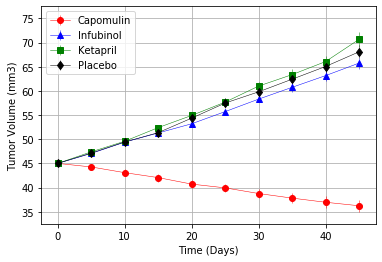

In [133]:
# Generate the Plot (with Error Bars)
plt.title("Tumor Response to Treatment")
plt.grid()
plt.xlim(-2.5, 47.5)
plt.ylim(32.5, 77.5)
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

x_axis = pivot_std_error_df.index
ax1_err = pivot_std_error_df['Capomulin']
ax1_vol = pivot_mean_tumor_volume_df['Capomulin']
plt.errorbar(x_axis, ax1_vol, ax1_err, label='Capomulin', color='r',marker="o", linewidth=0.5)

ax2_err = pivot_std_error_df['Infubinol']
ax2_vol = pivot_mean_tumor_volume_df['Infubinol']
plt.errorbar(x_axis, ax2_vol, ax2_err, label='Infubinol', color="b",marker="^", linewidth=0.5)

ax3_err = pivot_std_error_df['Ketapril']
ax3_vol = pivot_mean_tumor_volume_df['Ketapril']
plt.errorbar(x_axis, ax3_vol, ax3_err, label='Ketapril', color="g", marker="s", linewidth=0.5)

ax4_err = pivot_std_error_df['Placebo']
ax4_vol = pivot_mean_tumor_volume_df['Placebo']
plt.errorbar(x_axis, ax4_vol, ax4_err, label='Placebo', color="k", marker="d", linewidth=0.5);

plt.legend(loc='best')

# Save the Figure
plt.savefig("Images/tumor_treatment.png")


In [134]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [135]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site_df = mouse_clinical_trial_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
mean_met_site_df = mean_met_site_df.reset_index()
# Preview DataFrame
mean_met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [136]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_std_error_df = mouse_clinical_trial_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
met_std_error_df = met_std_error_df.reset_index()
# Preview DataFrame
met_std_error_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [137]:
# Minor Data Munging to Re-Format the Data Frames
# Create pivot table for standard error
pivot_met_std_error_df = met_std_error_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
pivot_met_std_error_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [155]:
# Create pivot table for met sites
pivot_mean_met_site_df = mean_met_site_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
pivot_mean_met_site_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


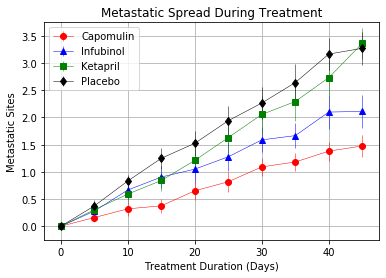

In [154]:
# Generate the Plot (with Error Bars)
plt.title("Metastatic Spread During Treatment")
plt.grid()
plt.xlim(-2.5, 47.5)
plt.ylim(-0.25, 3.75)
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')

x_axis = pivot_met_std_error_df.index
ax1_err = pivot_met_std_error_df['Capomulin']
ax1_met = pivot_mean_met_site_df['Capomulin']
plt.errorbar(x_axis, ax1_met, ax1_err, label='Capomulin', color='r',marker="o", linewidth=0.5)

ax2_err = pivot_met_std_error_df['Infubinol']
ax2_met = pivot_mean_met_site_df['Infubinol']
plt.errorbar(x_axis, ax2_met, ax2_err, label='Infubinol', color="b",marker="^", linewidth=0.5)

ax3_err = pivot_met_std_error_df['Ketapril']
ax3_met = pivot_mean_met_site_df['Ketapril']
plt.errorbar(x_axis, ax3_met, ax3_err, label='Ketapril', color="g", marker="s", linewidth=0.5)

ax4_err = pivot_met_std_error_df['Placebo']
ax4_met = pivot_mean_met_site_df['Placebo']
plt.errorbar(x_axis, ax4_met, ax4_err, label='Placebo', color="k", marker="d", linewidth=0.5);

plt.legend(loc='best')

# Save the Figure
plt.savefig("Images/met_sites.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [140]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_df = mouse_clinical_trial_df.groupby(['Drug','Timepoint'])['Mouse ID'].count()

# Convert to DataFrame
survival_df = survival_df.reset_index()

# Preview DataFrame
survival_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [156]:
# Minor Data Munging to Re-Format the Data Frames
pivot_survival_df = survival_df.pivot(index='Timepoint',columns='Drug',values='Mouse ID')

# Preview the Data Frame
pivot_survival_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [142]:
# change pivot table to percentages taking the amount at zero to be original amounts of mice
pivot_survival_pct_df= pivot_survival_df

cols=list(pivot_survival_df.columns)
for i in range(len(cols)):
    pivot_survival_pct_df[cols[i]] = pivot_survival_pct_df[cols[i]] *100 / pivot_survival_pct_df.iloc[0,i]
pivot_survival_pct_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


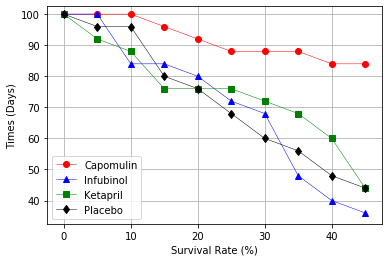

In [143]:
# Generate the Plot (Accounting for percentages)
plt.title("Survival During Treatment")
plt.grid()
plt.xlim(-2.5, 47.5)
plt.ylim(32.5, 102.5)
plt.xlabel('Survival Rate (%)')
plt.ylabel('Times (Days)')

x_axis = pivot_survival_pct_df.index
ax1 = pivot_survival_pct_df['Capomulin']
plt.plot(x_axis, ax1, label='Capomulin', color='r',marker="o", linewidth=0.5)

ax2 = pivot_survival_pct_df['Infubinol']
plt.plot(x_axis, ax2, label='Infubinol', color="b",marker="^", linewidth=0.5)

ax3 = pivot_survival_pct_df['Ketapril']
plt.plot(x_axis, ax3, label='Ketapril', color="g", marker="s", linewidth=0.5)

ax4 = pivot_survival_pct_df['Placebo']
plt.plot(x_axis, ax4, label='Placebo', color="k", marker="d", linewidth=0.5);

plt.legend(loc='best')

# Save the Figure
plt.savefig("Images/survival_rates.png")

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [144]:
# Calculate the percent changes for each drug
pct_change_df = (pivot_mean_tumor_volume_df.iloc[-1]/pivot_mean_tumor_volume_df.iloc[0] -1)*100

# Display the data to confirm
pct_change_df

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [145]:
# Store all Relevant Percent Changes into a Tuple
pct_change_df_tuple = tuple([i for i in pct_change_df.values])
pct_change_df_tuple


(-19.47530266789417,
 42.516491855897456,
 46.12347172785187,
 57.02879468660606,
 53.92334713476923,
 51.29796048315151,
 47.24117486320636,
 -22.32090046276667,
 52.085134287899024,
 46.57975086509525)

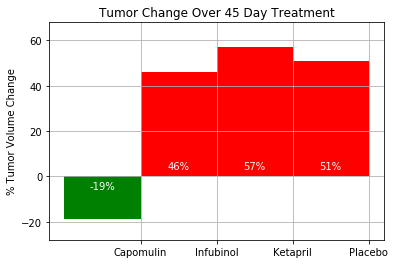

In [151]:
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor Change Over 45 Day Treatment")
plt.grid()
plt.xlim(-0.2, 4.2)
plt.ylim(-28, 68)

x_axis = [1,2,3,4]
tick_name=['Capomulin','Infubinol','Ketapril','Placebo']
 
height = [int(pct_change_df[x]) for x in tick_name]
colors = ['r' if x >0 else 'g' for x in height]

plt.bar(x_axis, height, width=-1, color=colors, align='edge')
plt.xticks(x_axis,tick_name)
plt.ylabel("% Tumor Volume Change")

# Use functions to label the percentages of changes
text_xloc=[x-0.5 for x in x_axis]
text_yloc=[2.5 if x >0 else (-6.5) for x in height]
text=[f'{x}%' for x in height]

# Call functions to implement the function calls
for i in range(len(text)):
    plt.text(text_xloc[i],text_yloc[i],text[i],ha="center", va="bottom", color = "w")

# Save the Figure
plt.savefig("Images/summary_bar_graph.png", dpi=300)

# Show the Figure
fig.show()


![Metastatic Spread During Treatment](../Images/change.png)

# Observations

Pymaceuticals Inc.'s most recent animal study involved 250 mice and ran for 45 days.  The primary objective was to focus on the outcome of the mice that were treated with Capomulin, Infubinol, Ketapril and the Placebo.  Three main observations were:

1 - Although the cancer spread in all mice.  The mice taking Capomulin saw the least increase in metastatic sites.  After 45 days, Capomulin increased to 1.5 sites, while Infubinol had an average spread of 2 sites and both Ketapril and Placebo increeased to 3 sites (Ketapril slightly more than the Placebo).

2 - The average tumor volume for all mice was 45mm3. After 45 days, Capomulin reduced to an average of 36mm3.  Infubinol and Ketapril increased more than twice the rate that Capolin decreased. Infubinol increased in volume to 65mm3, the Placebo average was 68mm3 while Ketapril increased more than the Placebo to 75mm3.

3 - All mice on Capomulin survived the first 10 days and after 45 days over 80% of the mice were still alive.  While the mice on Infubinol and Ketapril did not do much better than the Placebo.  After 45 days, less than 50% of the mice on Infubinol and Ketapril survived. Ketapril appears to have done more harm than taking the Placebo.

In conclusion, there was a 19% reduction in the tumours of the mice in the Capomulin group.  The Chief Data Analyst recommends further investment and exploration in Capomulin. The Chief Data Analyst also suggests that Ketapril not have further testing as it had worse results than the Placebo.